In [1]:
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python get-pip.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 81 2509k   81 2052k    0     0  3014k      0 --:--:-- --:--:-- --:--:-- 3023k
100 2509k  100 2509k    0     0  3562k      0 --:--:-- --:--:-- --:--:-- 3569k


  Using cached pip-22.3-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3


In [2]:
# Load csv file into a dataframe
import pandas as pd
Data = pd.read_csv("train.csv")
Data.drop(["Flow ID","Timestamp"],axis=1,inplace=True)
Data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1042042,47294.0,772344443,80.0,6.0,1305334.0,8.0,6.0,580.0,254.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9813922543,443.0,1042042,55559.0,6.0,2910.0,1.0,1.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1042042,58579.0,18016315184,80.0,6.0,43792665.0,2.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,10420151,46440.0,123125115190,80.0,6.0,2461988.0,2.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,1191467434,80.0,10420211,51215.0,6.0,36.0,2.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [3]:
Data['Label'].map({1:0,2:1,3:2,4:3,5:4,6:5,7:6,8:7,9:8,10:9,11:10,12:11})
Data['Label'].value_counts()

0     44517
1     39765
2     33678
3     33618
4     22197
5     15026
6     12371
7      7429
8      6401
9      6065
10     5993
11      419
Name: Label, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

D1,D2=train_test_split(Data,test_size=0.5,random_state = 100)

In [5]:
D1.shape

(113739, 83)

In [6]:
D1_y = D1['Label']
D1_x = D1.drop('Label', axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

D3,D4=train_test_split(D2,test_size=0.2,random_state = 100)

In [8]:
D4_y = D4['Label']
D4_x = D4.drop('Label', axis = 1)

In [9]:
from sklearn.model_selection import train_test_split
D1_x_train, D1_x_test, D1_y_train, D1_y_test = train_test_split(D1_x,D1_y,test_size=0.2, random_state =100)

In [10]:
D3_y = D3['Label']
D3_x = D3.drop('Label', axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
D3_x_train, D3_x_test, D3_y_train, D3_y_test = train_test_split(D3_x,D3_y,test_size=0.2, random_state =100)

In [12]:
# scale data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
nor = MinMaxScaler()

nor.fit(D1_x_train)
D1_x_train_scaled = nor.transform(D1_x_train)
nor.fit(D1_x_test)
D1_x_test_scaled = nor.transform(D1_x_test)

# scale data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
nor = MinMaxScaler()

nor.fit(D3_x_train)
D3_x_train_scaled = nor.transform(D3_x_train)
nor.fit(D3_x_test)
D3_x_test_scaled = nor.transform(D3_x_test)

# scale data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
nor = MinMaxScaler()

nor.fit(D4_x)
D4_x_scaled = nor.transform(D4_x)

In [13]:
#APPLY AUTOENCODERS 
#from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Model, load_model
#from tensorflow.keras.initializers import glorot_uniform
#from keras.optimizers import SGD

encoding_dim = 100

n_inputs= D3_x_train_scaled.shape[1]

#Now, we want to define our encoder.
encoder_input = Input(shape=(n_inputs, ),name='encoder_input')

x1 = Dense(n_inputs*3, activation="relu")(encoder_input)
x1 = BatchNormalization()(x1)

x2 = Dense(n_inputs*2, activation="relu")(x1)
x2 = BatchNormalization()(x2)

x3 = Dense(n_inputs, activation="relu")(x2)
x3 = BatchNormalization()(x3)

x4 = Dense(n_inputs-10, activation="relu")(x3)
x4 = BatchNormalization()(x4)

x5 = Dense(n_inputs-20, activation="relu")(x4)
x5 = BatchNormalization()(x5)

x6 = Dense(n_inputs-30, activation="relu")(x5)
x6 = BatchNormalization()(x6)

x7 = Dense(n_inputs-40, activation="relu")(x6)
x7 = BatchNormalization()(x7)

x8 = Dense (n_inputs-50, activation= "relu")(x7)
x8 = BatchNormalization()(x8)

x9 = Dense (n_inputs-60, activation= "relu")(x8)
x9 = BatchNormalization()(x9)

x10 = Dense (n_inputs-70, activation= "relu")(x9)
x10 = BatchNormalization()(x10)

encoder_output = Dense (encoding_dim, activation= "relu")(x10)

#Encoder Model
encoder = Model(encoder_input, encoder_output, name='encoder')

#Now, we want to define our decoder.
decoder_input = Dense(encoding_dim, activation="relu")(encoder_output)

y1 = Dense(n_inputs-70, activation="relu")(decoder_input)
y1 = BatchNormalization()(y1)            

y2 = Dense (n_inputs-60, activation= "relu")(y1)
y2 = BatchNormalization()(y2) 

y3 = Dense (n_inputs-50, activation= "relu")(y2)
y3 = BatchNormalization()(y3) 

y4 = Dense (n_inputs-40, activation= "relu")(y3)
y4 = BatchNormalization()(y4) 

y5 = Dense (n_inputs-30, activation= "relu")(y4)
y5 = BatchNormalization()(y5) 
                 
y6 = Dense (n_inputs-20, activation= "relu")(y5)
y6 = BatchNormalization()(y6) 

y7 = Dense (n_inputs-10, activation= "relu")(y6)
y7 = BatchNormalization()(y7) 

y8 = Dense (n_inputs, activation= "relu")(y7)
y8 = BatchNormalization()(y8) 

y9 = Dense (n_inputs*2, activation= "relu")(y8)
y9 = BatchNormalization()(y9) 
                                                        
y10 = Dense (n_inputs*3, activation= "relu")(y9)
y10 = BatchNormalization()(y10) 

decoder_output = Dense (n_inputs, activation= "linear")(y10)

#Decoder Model
decoder = Model(encoder_output, decoder_output, name= 'decoder')

#We'll also combine this encoder and decoder into a singular "autoencoder" model:
autoencoder = Model(encoder_input, decoder_output, name='autoencoder')

#Now that the model architecture is done, we'll set an optimizer:
import tensorflow as tf  
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)

autoencoder.summary()

#We'll now compile our model with the optimizer and a loss metric. We'll use mean squared error for loss (mse).
autoencoder.compile(optimizer= opt, loss='mean_squared_error')

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 82)]              0         
                                                                 
 dense (Dense)               (None, 246)               20418     
                                                                 
 batch_normalization (BatchN  (None, 246)              984       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 164)               40508     
                                                                 
 batch_normalization_1 (Batc  (None, 164)              656       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 82)                

In [14]:
#fit the autoencoder model 
ae = autoencoder.fit(D3_x_train_scaled, D3_x_train_scaled, epochs= 100, batch_size=16, verbose=2, validation_data=(D3_x_test_scaled,D3_x_test_scaled))

Epoch 1/100
4550/4550 - 40s - loss: 0.1387 - val_loss: 0.2977 - 40s/epoch - 9ms/step
Epoch 2/100
4550/4550 - 31s - loss: 0.0237 - val_loss: 0.0887 - 31s/epoch - 7ms/step
Epoch 3/100
4550/4550 - 30s - loss: 0.0135 - val_loss: 0.0662 - 30s/epoch - 7ms/step
Epoch 4/100
4550/4550 - 30s - loss: 0.0099 - val_loss: 0.0604 - 30s/epoch - 7ms/step
Epoch 5/100
4550/4550 - 44s - loss: 0.0084 - val_loss: 0.0559 - 44s/epoch - 10ms/step
Epoch 6/100
4550/4550 - 45s - loss: 0.0075 - val_loss: 0.0539 - 45s/epoch - 10ms/step
Epoch 7/100
4550/4550 - 45s - loss: 0.0069 - val_loss: 0.0533 - 45s/epoch - 10ms/step
Epoch 8/100
4550/4550 - 46s - loss: 0.0066 - val_loss: 0.0501 - 46s/epoch - 10ms/step
Epoch 9/100
4550/4550 - 46s - loss: 0.0062 - val_loss: 0.0517 - 46s/epoch - 10ms/step
Epoch 10/100
4550/4550 - 46s - loss: 0.0060 - val_loss: 0.0522 - 46s/epoch - 10ms/step
Epoch 11/100
4550/4550 - 45s - loss: 0.0058 - val_loss: 0.0504 - 45s/epoch - 10ms/step
Epoch 12/100
4550/4550 - 46s - loss: 0.0056 - val_loss: 

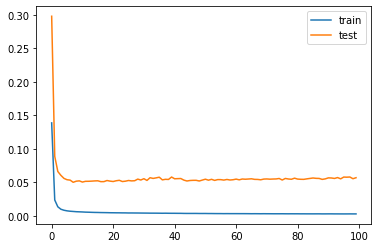

In [15]:
# plot for loss (epoch 100 )
from matplotlib import pyplot
pyplot.plot(ae.history['loss'], label='train')
pyplot.plot(ae.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [18]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ae, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://6e3611ed-a45a-4940-aa4a-14926d2644b2/assets


In [16]:
encoder.Trainable = False

In [17]:
def fcModel():
  input = Input(shape=(D1_x_train.shape[1],))
  enco = encoder(input)

  z1 = Dense(n_inputs*3, activation="relu")(enco)
  z1 = BatchNormalization()(z1)

  z2 = Dense(n_inputs*2, activation="relu")(z1)
  z2 = BatchNormalization()(z2)

  z3 = Dense(n_inputs, activation="relu")(z2)
  z3 = BatchNormalization()(z3)

  z4 = Dense(n_inputs-7, activation="relu")(z3)
  z4 = BatchNormalization()(z4)

  z5 = Dense(n_inputs-14, activation="relu")(z4)
  z5 = BatchNormalization()(z5)

  z6 = Dense(n_inputs-30, activation="relu")(z5)
  z6 = BatchNormalization()(z6)

  z7 = Dense(n_inputs-40, activation="relu")(z6)
  z7 = BatchNormalization()(z7)

  z8 = Dense (n_inputs-50, activation= "relu")(z7)
  z8 = BatchNormalization()(z8)

  z9 = Dense (n_inputs-60, activation= "relu")(z8)
  z9 = BatchNormalization()(z9)

  z10 = Dense (n_inputs-70, activation= "relu")(z9)
  z10 = BatchNormalization()(z10)

  z11 = Dense (n_inputs-80, activation= "relu")(z10)
  z11 = BatchNormalization()(z11)

  z12 = Dense (n_inputs-450, activation= "relu")(z11)
  z12 = BatchNormalization()(z12)

  z13 = Dense (n_inputs-460, activation= "relu")(z12)
  z13 = BatchNormalization()(z13)
  
  output = Dense (5, activation= "softmax")(z13)
  
  model = Model(input, output)

  return model

final_model = fcModel()
final_model.summary()

ValueError: Exception encountered when calling layer "encoder" (type Functional).

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 82, but received input with shape (None, 470)

Call arguments received by layer "encoder" (type Functional):
  • inputs=tf.Tensor(shape=(None, 470), dtype=float32)
  • training=False
  • mask=None

In [ ]:
import tensorflow
tensorflow.keras.utils.plot_model(final_model)

: 

In [ ]:
#Now that the model architecture is done, we'll set an optimizer:
import tensorflow as tf  
optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)

: 

In [ ]:
#We'll now compile our model with the optimizer and a loss metric. We'll use mean squared error for loss (mse).
import keras
final_model.compile(optimizer= optimizer, loss= keras.losses.SparseCategoricalCrossentropy(),metrics=[keras.metrics.SparseCategoricalAccuracy()])

: 

In [ ]:
vc = D1_y_train.value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(D1_y_train), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

: 

In [ ]:
vc = D1_y_test.value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(D1_y_test), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

: 

In [ ]:
#D1_y_train, D1_y_test(ForTraining the final model)

D1ytrain = keras.utils.to_categorical(D1_y_train, dtype ="int64")
print(D1ytrain.shape)
D1ytest = keras.utils.to_categorical(D1_y_test, dtype ="int64")
print(D1ytest.shape)

: 

In [ ]:
final_model.fit(D1_x_train_scaled, D1_y_train,epochs=100,batch_size=16, verbose=2, validation_data=(D1_x_test_scaled,D1_y_test))

: 

In [ ]:
#evaluate the network
print("[INFO] evaluating network...")
score, acc = final_model.evaluate(D4_x_scaled, D4_y)
print('test accuracy:', acc)
print('score',score)

: 

In [ ]:
y_pred = final_model.predict(D4_x_scaled, batch_size=16)

: 

In [ ]:
y_predargmax = tf.argmax(y_pred, 1)
print(y_predargmax)

: 

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(D4_y, y_predargmax))

: 

: 